@This notebook was written by The Cuong

<center> <h1> Exploratory Data Analysis - Shopee <h1> <center>

## Import và đọc dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sm
plt.style.use('ggplot')

In [ ]:
class StringConverter(dict):
    def __contains__(self, item):
        return True

    def __getitem__(self, item):
        return str

    def get(self, default=None):
        return str

In [ ]:
bank_accounts = pd.read_csv("/content/drive/Othercomputers/My Laptop/Shopee/fraud_shopee/bank_accounts.csv", converters=StringConverter())
credit_card = pd.read_csv("/content/drive/Othercomputers/My Laptop/Shopee/fraud_shopee/credit_cards.csv", converters=StringConverter())
devices = pd.read_csv("/content/drive/Othercomputers/My Laptop/Shopee/fraud_shopee/devices.csv", converters=StringConverter())
orders = pd.read_csv("/content/drive/Othercomputers/My Laptop/Shopee/fraud_shopee/orders.csv", converters=StringConverter())
submiss = pd.read_csv("/content/drive/Othercomputers/My Laptop/Shopee/fraud_shopee/submission.csv", converters=StringConverter())

# Chuẩn bị dữ liệu

* Kiểm tra các dòng trùng
* Tạo cột thuộc tính mới

In [ ]:
bank_accounts.isna().sum()

userid          0
bank_account    0
dtype: int64

In [ ]:
bank_accounts.loc[bank_accounts.duplicated()]

,userid,bank_account
17103,165366362,9340289132
18476,53784054,3430499993
18869,8441264,0320142333
34053,99141812,3032984244
37755,108882620,2940831490
...,...,...
347338,31010794,0299203022
347398,168409446,4299821982
347510,105119648,2998238092
349331,163114748,0230082911


In [ ]:
bank_accounts = bank_accounts.drop_duplicates()

In [ ]:
credit_card.isna().sum()

userid         0
credit_card    0
dtype: int64

In [ ]:
credit_card.loc[credit_card.duplicated()]

,userid,credit_card


In [ ]:
credit_card[['card_number','year']] = credit_card['credit_card'].str.split('|', expand = True)


In [ ]:
credit_card[['month', 'year']] = credit_card['year'].str.split('-', expand = True)

In [ ]:
devices.isna().sum()

userid    0
device    0
dtype: int64

In [ ]:
devices.loc[devices.duplicated()]

,userid,device


In [ ]:
orders.isna().sum()

orderid          0
buyer_userid     0
seller_userid    0
dtype: int64

In [ ]:
orders.loc[orders.duplicated()]

,orderid,buyer_userid,seller_userid


# Hiểu về dữ liệu

### device

In [ ]:
devices

,userid,device
0,10499978,0Zu/mWZ4cFsvobYglgZEc5VSxwwajRwrm74pBuwnrTu=
1,54526742,zBMRKyz98iy5Z7sh+JIOdF612J1CB8ggvFBI6MP361q=
2,33152428,KXC0oY3MMrTG+bnlFFvBPXZC5PW8iw6kgWztENWdIJg=
3,55020986,anRXS7+zVgCGKz5C9X3dzewIhSdojGEi5TO07pb2y+K=
4,100471502,hbIARr+USwvjjzc8QUVtD5a/apR1DJX6P3fYvgDL4gW=
...,...,...
1430306,7061456,ZSTXD6wfHN/1qPVqMrIbwHYX5ELWlUPO3NFXCHK50Mc=
1430307,26416970,o+9gbX201ITS3MuMZYjuZUzV7sOoR57/0ttyX3eSWTA=
1430308,79633116,NZhNiXYhArpPquzrqh/kVj2IZ3QPRKm6FH90vsTlhiy=
1430309,19883370,dZ7YqVTprtTvLT4qS0YEWsn9EJahBJVQtTLKC6WaHZA=


In [ ]:
devices['userid'].value_counts()

8158386      582
16111126     521
698234       375
26912434     243
19390654     193
            ... 
117387870      1
145053186      1
145182766      1
145477230      1
146027766      1
Name: userid, Length: 481519, dtype: int64

Text(0, 0.5, 'counts')

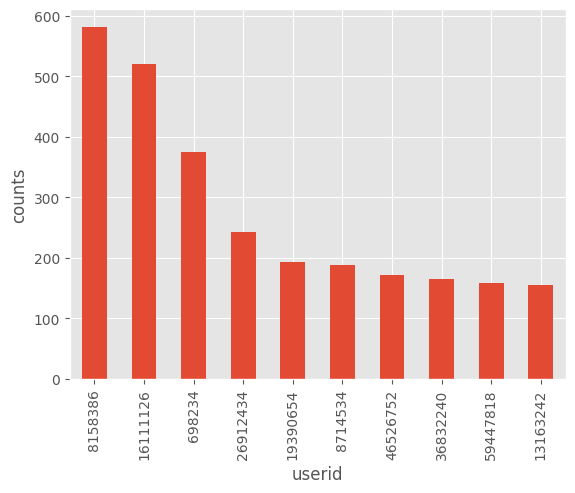

In [ ]:
ax = devices['userid'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('userid')
ax.set_ylabel('counts')

Kết quả trên hoàn toàn có thể xảy ra trường hợp có một lượng lớn khách hàng không có thiết bị. Ta hoàn toàn có thể loại bỏ những khách hàng không có thiết bị. Bởi vì những khách hàng không có thiết bị không thể có giao dịch gian lận vì bị khuyết chi tiết.

In [ ]:
devices['device'].value_counts()

OqtiOn3PQUFp/QE5HMhvVww2jndmQ7ZTKlaRqnhdqBK=    36
Uzee3tLpqvmCbggwXmjXnX+X+R3sL1XuahyZ2UFSneA=    29
Ek+CYZB5GiI2bz6r9uR+bq78vCKNT2fPW6f2gY+phWA=    29
ATfLHxh5g2BoQr4UXuJklwKdZry2xMFzh/4VTrag/d4=    23
miqxCLQbQ3nNjaVVhwpiw5EC192XPpP1q/mRiWUXULu=    22
                                                ..
OdqeMn3zvAqdLxskpT9hKFIyHCDB6WCkAfXTLafLp4A=     1
cvQiwm4DSIykCh5VTRbL9+tZB2n0/eT2YCXCeyFqMsg=     1
scNDhxMvxz1L74cG9IQ9Q3ZGthNp7X09iuMx3iyHA9c=     1
q+/aXO30WJS4EfTOIWEnVkUujVJgM9fZUb/RUzNAFhI=     1
Mtmaool7T0CUyHJD112gAw6OiTl4tVSAPK4njG9B56y=     1
Name: device, Length: 1363287, dtype: int64

Text(0, 0.5, 'counts')

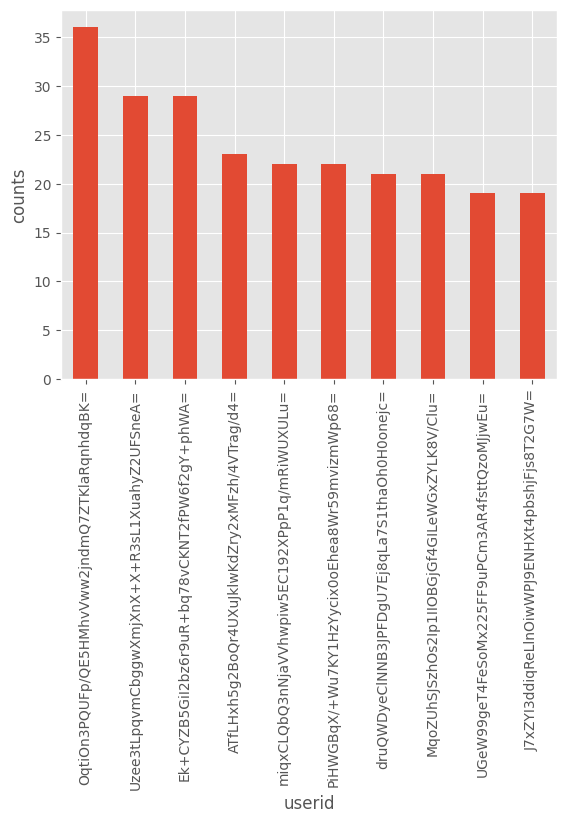

In [ ]:
ax = devices['device'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('userid')
ax.set_ylabel('counts')

Có thể loại bỏ những thiết bị chỉ có 1 người dùng, bởi vì nếu chỉ có 1 người dùng, thiết bị sẽ không thể là một thành phần của giao dịch gian lận

### bank_accounts

In [ ]:
bank_accounts['userid'].value_counts()

8767344     39
54464650    36
44790496    35
2019758     29
24993868    28
            ..
29275748     1
31413314     1
32127846     1
26784568     1
13282776     1
Name: userid, Length: 255495, dtype: int64

Text(0, 0.5, 'counts_bank_account')

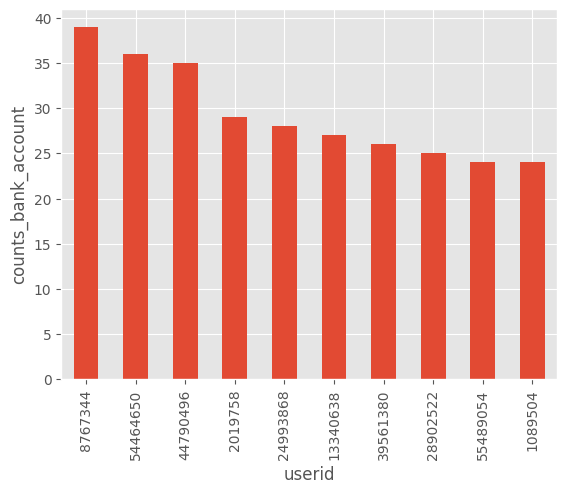

In [ ]:
ax = bank_accounts['userid'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('userid')
ax.set_ylabel('counts_bank_account')

In [ ]:
bank_accounts['bank_account'].value_counts()

0934222000         89
0931388844         23
8330981244         18
9930843399         15
9920214119         13
                   ..
299902093343821     1
409902320100        1
8228042481          1
2020833392          1
0942232333          1
Name: bank_account, Length: 328543, dtype: int64

Text(0, 0.5, 'counts_users')

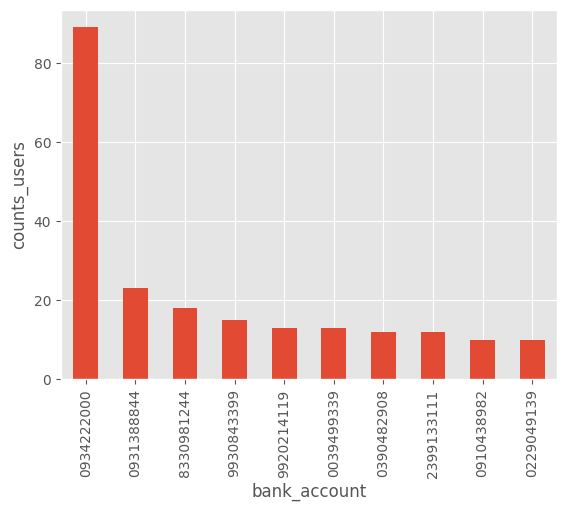

In [ ]:
ax = bank_accounts['bank_account'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('bank_account')
ax.set_ylabel('counts_users')

### Credit_card

In [ ]:
credit_card['userid'].value_counts()

24294346    20
2264618     19
14179400    19
1489372     19
5632228     18
            ..
12341628     1
7406636      1
14467904     1
18097322     1
9331492      1
Name: userid, Length: 22099, dtype: int64

Text(0, 0.5, 'counts_userid')

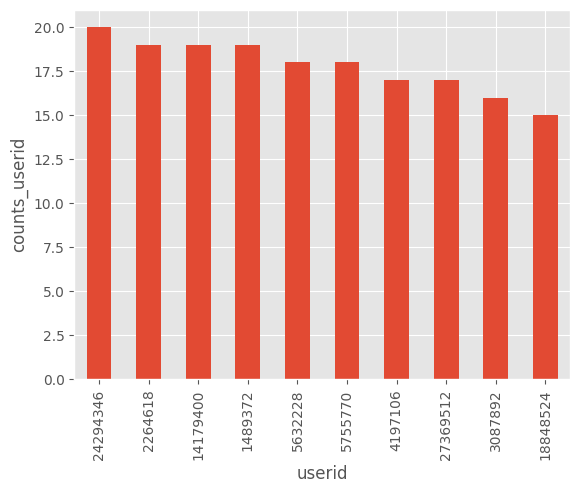

In [ ]:
ax = credit_card['userid'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('userid')
ax.set_ylabel('counts_userid')

In [ ]:
credit_card['credit_card'].value_counts()

388322xxxxxx2203|01-2021    5
388322xxxxxx9928|04-2021    4
301433xxxxxx9423|06-2024    4
388322xxxxxx4902|05-2021    4
388322xxxxxx9102|11-2020    4
                           ..
322429xxxxxx1393|02-2020    1
388322xxxxxx8420|10-2021    1
322429xxxxxx3938|10-2021    1
388322xxxxxx9403|01-2021    1
392843xxxxxx2933|07-2021    1
Name: credit_card, Length: 37367, dtype: int64

Text(0, 0.5, 'counts_users')

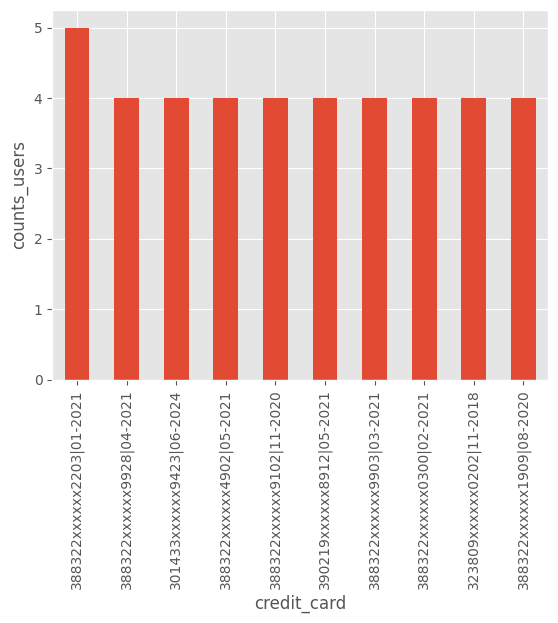

In [ ]:
ax = credit_card['credit_card'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('credit_card')
ax.set_ylabel('counts_users')

In [ ]:
credit_card['year'].value_counts()

2020    9225
2021    8139
2019    7426
2018    5227
2022    4798
2017    2255
2023     414
2016     382
2026     228
2024     224
2025     214
2027     174
2121       1
2015       1
Name: year, dtype: int64

Text(0, 0.5, 'counts_users')

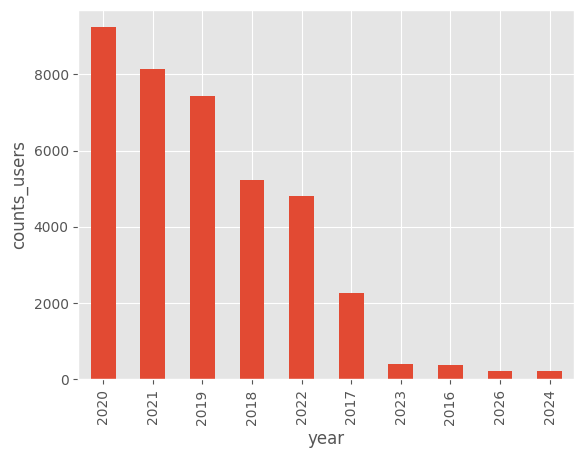

In [ ]:
ax = credit_card['year'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('year')
ax.set_ylabel('counts_users')

Ta có thể loại bỏ các thẻ đã hết hạn, tức những thẻ hết hết hạn trước năm 2019

### Order

In [ ]:
orders.head(10)

,orderid,buyer_userid,seller_userid
0,1953278092,47388162,20822974
1,1953295120,26855196,16416890
2,1953306402,121296714,28477978
3,1953314712,131221930,72837912
4,1953381964,183398314,28423332
5,1953383372,69247284,62795594
6,1953451192,89510674,18186196
7,1953453596,198638326,7314602
8,1953479046,202508756,1988634
9,1953480060,130236220,77145726


In [ ]:
orders['buyer_userid'].value_counts()

187679100    74
63997352     67
87169706     63
142603614    59
223176826    58
             ..
133190100     1
36858094      1
208480214     1
234720778     1
2978154       1
Name: buyer_userid, Length: 416105, dtype: int64

Text(0, 0.5, 'counts_orders')

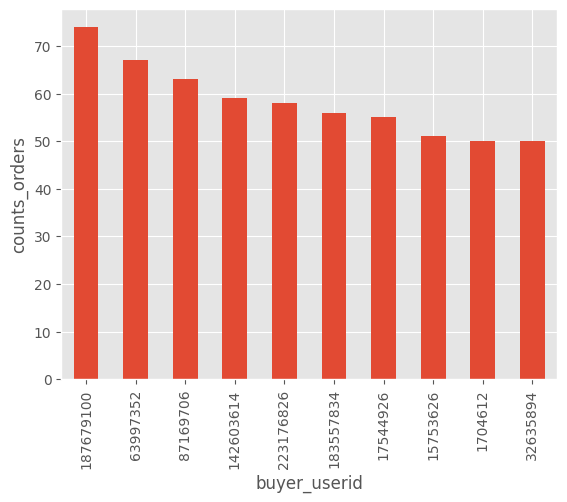

In [ ]:
ax =orders['buyer_userid'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('buyer_userid')
ax.set_ylabel('counts_orders')

Text(0, 0.5, 'counts_orders')

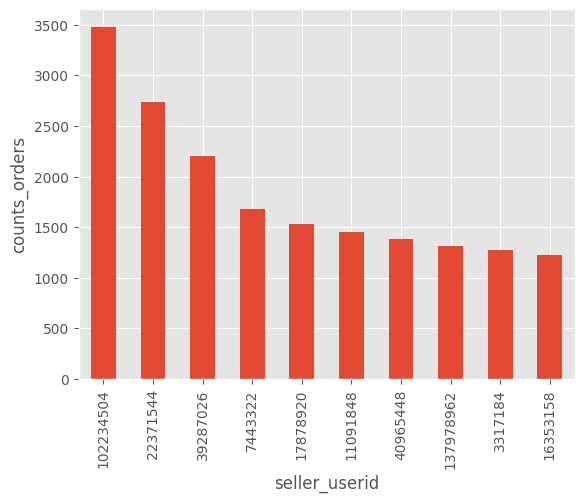

In [ ]:
ax =orders['seller_userid'].value_counts() \
      .head(10) \
      .plot(kind='bar')
ax.set_xlabel('seller_userid')
ax.set_ylabel('counts_orders')

# Other

Những User có liên quan đến nhau dựa trên thiết bị

In [ ]:
devices_userid = devices.groupby('device').agg(lambda x: set(x))
devices_userid

,userid
device,
+++3s/8YvFLP/ePRr1RQw27UpSq8iJAdybTVjPiHUc8=,{10146534}
+++GW0vx4xLjxTNHKWO+kWDS+w45sJZz//ZUlST6TCg=,{123913948}
+++b/gSDahdOss9vZHx/0qorN1zrvnT0DJ6vttl/YBE=,{147271198}
+++hbM5PFzSOZglwP8ORRbmr40UrvzEgCMq6ZtuJjMu=,{16126238}
+++ivFTF+M/DxnA21MRSxuqZO/KUheIu0RXva/O41sq=,"{66422306, 102164030}"
...,...
zzzAtrItC0RATj3jRi3MMCHj8dhao3DGksVio2ZS25K=,{11474934}
zzzLGRdBMVYjnK9E7bC3xlOS8nUF7oB8uhKBO33EbQW=,"{129766014, 9878070}"
zzzPPefKmM1TOYvQ1rSaV183Wk3rF9O6Rlg/T2vnIlI=,{182892992}


In [ ]:
devices_userid['count_userid'] = devices_userid['userid'].apply(lambda x: len(x))
devices_userid

,userid,count_userid
device,,
+++3s/8YvFLP/ePRr1RQw27UpSq8iJAdybTVjPiHUc8=,{10146534},1
+++GW0vx4xLjxTNHKWO+kWDS+w45sJZz//ZUlST6TCg=,{123913948},1
+++b/gSDahdOss9vZHx/0qorN1zrvnT0DJ6vttl/YBE=,{147271198},1
+++hbM5PFzSOZglwP8ORRbmr40UrvzEgCMq6ZtuJjMu=,{16126238},1
+++ivFTF+M/DxnA21MRSxuqZO/KUheIu0RXva/O41sq=,"{66422306, 102164030}",2
...,...,...
zzzAtrItC0RATj3jRi3MMCHj8dhao3DGksVio2ZS25K=,{11474934},1
zzzLGRdBMVYjnK9E7bC3xlOS8nUF7oB8uhKBO33EbQW=,"{129766014, 9878070}",2
zzzPPefKmM1TOYvQ1rSaV183Wk3rF9O6Rlg/T2vnIlI=,{182892992},1
